### Importing necessary libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

### Importing data set

In [2]:
Delivery_data = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-4/delivery_time.csv')
Delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
Delivery_data = Delivery_data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis =1)
Delivery_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Initial Analysis

In [6]:
Delivery_data.shape

(21, 2)

In [7]:
Delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
Delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

### Assumption check

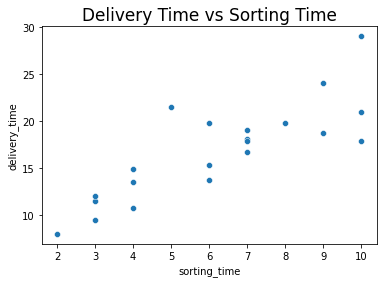

In [31]:
sns.scatterplot(x = 'sorting_time', y = 'delivery_time', data = Delivery_data)
plt.title('Delivery Time vs Sorting Time',size = 17)
plt.show()

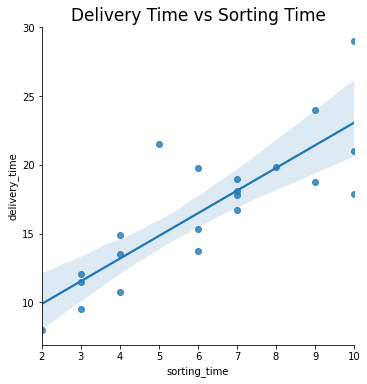

In [32]:
sns.lmplot(x = 'sorting_time', y = 'delivery_time', data = Delivery_data)
plt.title('Delivery Time vs Sorting Time',size = 17)
plt.show()

In [33]:
Delivery_data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


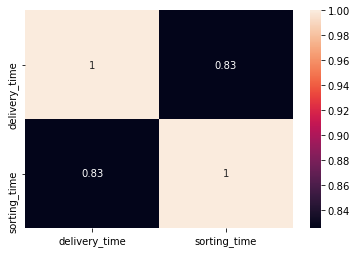

In [34]:
sns.heatmap(data = Delivery_data.corr(), annot = True)
plt.show()

### Model building

In [4]:
linear_model = smf.ols('delivery_time~sorting_time', data = Delivery_data).fit()

### Model Improvement

In [7]:
# Log transformation
Delivery_data['log_sorting_time'] = np.log(Delivery_data['sorting_time'])
Delivery_data

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585
5,15.35,6,1.791759
6,19.00,7,1.945910
7,9.50,3,1.098612
8,17.90,10,2.302585
9,18.75,9,2.197225


In [8]:
Delivery_data_log = Delivery_data[['delivery_time','log_sorting_time']]
Delivery_data_log

,delivery_time,log_sorting_time
0,21.00,2.302585
1,13.50,1.386294
2,19.75,1.791759
3,24.00,2.197225
4,29.00,2.302585
5,15.35,1.791759
6,19.00,1.945910
7,9.50,1.098612
8,17.90,2.302585
9,18.75,2.197225


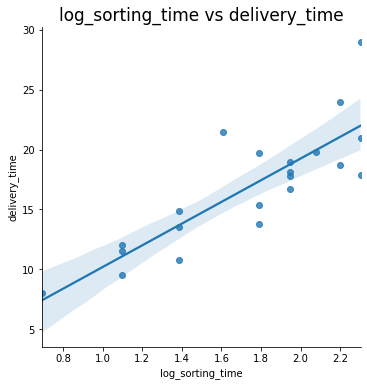

In [9]:
sns.lmplot(x = 'log_sorting_time', y = 'delivery_time', data = Delivery_data_log)
plt.title('log_sorting_time vs delivery_time',size = 17)
plt.show()

In [18]:
log_model = smf.ols('delivery_time~log_sorting_time', data=Delivery_data_log).fit()

In [11]:
# sqrt transformation
Delivery_data['sqrt_sorting_time'] = np.sqrt(Delivery_data['sorting_time'])
Delivery_data

,delivery_time,sorting_time,log_sorting_time,sqrt_sorting_time
0,21.00,10,2.302585,3.162278
1,13.50,4,1.386294,2.000000
2,19.75,6,1.791759,2.449490
3,24.00,9,2.197225,3.000000
4,29.00,10,2.302585,3.162278
5,15.35,6,1.791759,2.449490
6,19.00,7,1.945910,2.645751
7,9.50,3,1.098612,1.732051
8,17.90,10,2.302585,3.162278
9,18.75,9,2.197225,3.000000


In [12]:
Delivery_data_sqrt = Delivery_data[['delivery_time','sqrt_sorting_time']]
Delivery_data_sqrt

,delivery_time,sqrt_sorting_time
0,21.00,3.162278
1,13.50,2.000000
2,19.75,2.449490
3,24.00,3.000000
4,29.00,3.162278
5,15.35,2.449490
6,19.00,2.645751
7,9.50,1.732051
8,17.90,3.162278
9,18.75,3.000000


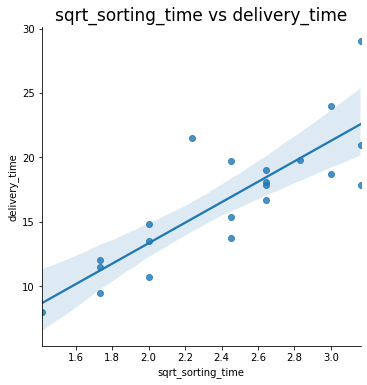

In [13]:
sns.lmplot(x = 'sqrt_sorting_time', y = 'delivery_time', data = Delivery_data_sqrt)
plt.title('sqrt_sorting_time vs delivery_time',size = 17)
plt.show()

In [17]:
sqrt_model = smf.ols('delivery_time~sqrt_sorting_time', data=Delivery_data_sqrt).fit()

### Model testing

In [15]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           3.98e-06
Time:                        23:29:27   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.64e-06
Time:                        23:30:23   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
sqrt_model.summary()   #sqrt model has the better R-squared value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Wed, 22 Dec 2021   Prob (F-statistic):           2.61e-06
Time:                        23:30:36   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
sqrt_sorting_time     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model prediction

In [41]:
# Manual prediction for sorting time 5
delivery_pred = (6.582734) + (1.649020)*(5)
delivery_pred

14.827834

In [22]:
# Automatic Prediction for sorting time 5,7,8,10
new_data=pd.Series([5,7,8,10])
new_data

0     5
1     7
2     8
3    10
dtype: int64

In [25]:
test_data = pd.DataFrame(new_data, columns=['sorting_time'])
test_data

,sorting_time
0,5
1,7
2,8
3,10


In [29]:
test_data['sqrt_sorting_time']=np.sqrt(test_data['sorting_time'])

In [30]:
sqrt_model.predict(test_data['sqrt_sorting_time'])

0    15.227920
1    18.479409
2    19.929232
3    22.578867
dtype: float64